# LetsGrowMore Beginner Level Task-2

# Deep Learning - Stock Market Prediction And Forecasting Using Stacked LSTM

Dataset Provided - https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

# Stacked LSTM (Long Short Term Memory)

A Long short-term memory (LSTM) is an artificial neural network (RNN) architecture used in the field of deep learning . Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points, but also entire sequences of data. LSTs are widely used for sequence prediction problems and is proven to be extremely effective. The reason they work so well is that LSTM can store past information and forget the information that is not.  

# Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Loading The Dataset

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [3]:
dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


# Exploratory Data Analysis 

In [4]:
type(dataset)

pandas.core.frame.DataFrame

In [5]:
dataset.shape

(2035, 8)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [7]:
dataset.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [8]:
dataset.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [9]:
dataset.sample(9)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1508,2012-08-24,132.00,132.00,127.70,129.00,128.85,1520284,1961.33
1170,2014-01-02,160.50,161.75,153.75,154.60,154.95,2116255,3351.03
1409,2013-01-17,157.00,158.50,154.50,154.95,154.95,2079725,3235.08
1709,2011-11-08,91.10,91.65,90.50,90.55,90.75,331397,301.41
621,2016-03-29,119.10,120.40,118.40,119.00,119.30,3588313,4282.06
1951,2010-11-16,124.75,126.15,120.00,120.50,121.20,1118449,1363.63
1517,2012-08-09,129.40,133.25,128.00,132.00,131.25,2732118,3589.06
264,2017-09-06,195.10,207.20,194.60,206.50,205.95,14490021,29584.24
900,2015-02-10,148.90,153.15,148.00,151.80,151.55,1719968,2596.83


In [10]:
dataset.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


# Data Cleaning

Checking for Null values in the given dataset (if any)

In [11]:
dataset.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False


In [12]:
dataset.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [13]:
dataset.isna().any()

Date                    False
Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
dtype: bool

# Selecting A Particular Column From The Dataset For Price Prediction

Here, we choose the column 'High' from the dataset to predicting the future Stock Price

In [14]:
df = dataset.reset_index()['High']
df

0       235.95
1       236.80
2       240.00
3       236.75
4       239.20
         ...  
2030    119.50
2031    121.00
2032    121.95
2033    122.00
2034    123.00
Name: High, Length: 2035, dtype: float64

Visualizing the 'High' Column Data Graph

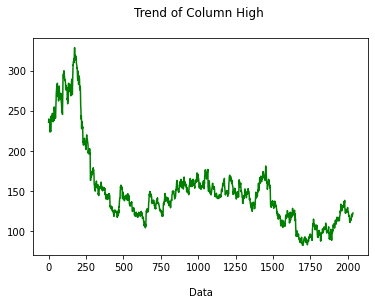

In [15]:
plt.plot(df,color = 'green')
plt.title('Trend of Column High \n')
plt.xlabel('\nData')
plt.show()

# Min-Max Scaler

LSTM are sensitive to the scale of the data , so using Min-Max scaler to transform the values from 0 to 1.So in order to do that we need to reshape so taht we can fit transform

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
sc = MinMaxScaler(feature_range=(0,1))
df2 = sc.fit_transform(np.array(df).reshape(-1,1))

Now the df is transformed into an array and it now having the values between zero to one

In [18]:
df

0       235.95
1       236.80
2       240.00
3       236.75
4       239.20
         ...  
2030    119.50
2031    121.00
2032    121.95
2033    122.00
2034    123.00
Name: High, Length: 2035, dtype: float64

In [19]:
df2

array([[0.62268754],
       [0.62614353],
       [0.6391543 ],
       ...,
       [0.15917869],
       [0.15938199],
       [0.16344786]])

# Training and Testing the data

Since we are going the Time Series data so one data is dependent on other data therefore the training size should be 65% of the total length of the dataframe whereas the test size should be the difference between the length of the dataset and the training size

In [20]:
trainset = int(len(df2)*0.65)
testset = len(df2)-trainset

In [21]:
trainset,testset

(1322, 713)

In [22]:
trainset2 = df2[0:trainset,:]
testset2 = df2[trainset:len(df2),:1]

In [23]:
trainset2

array([[0.62268754],
       [0.62614353],
       [0.6391543 ],
       ...,
       [0.25594633],
       [0.26794064],
       [0.24883106]])

In [24]:
testset2

array([[0.24069933],
       [0.2447652 ],
       [0.25818256],
       [0.25736938],
       [0.26448465],
       [0.26428136],
       [0.26651758],
       [0.26550112],
       [0.25899573],
       [0.26956699],
       [0.26509453],
       [0.26997357],
       [0.28705021],
       [0.28054483],
       [0.27159992],
       [0.27241309],
       [0.2722098 ],
       [0.27261639],
       [0.26509453],
       [0.25167717],
       [0.23643017],
       [0.23033137],
       [0.23785322],
       [0.23744664],
       [0.22972149],
       [0.22341939],
       [0.21305143],
       [0.20695263],
       [0.20369994],
       [0.20369994],
       [0.19922749],
       [0.21223826],
       [0.20939215],
       [0.18763976],
       [0.19394186],
       [0.21325473],
       [0.2110185 ],
       [0.20126042],
       [0.18784306],
       [0.17198618],
       [0.18885952],
       [0.18174426],
       [0.18621671],
       [0.19353527],
       [0.20085383],
       [0.20410653],
       [0.21874365],
       [0.215

Converying the array of values to create a dataset matrix with time-step = 1 and output 1

In [25]:
def dataset_matrix(data,timestep = 1):
    x_data, y_data = [],[]
    for i in range (len(data)-timestep -1):
        var1 = data[i:(i+timestep),0]
        x_data.append(var1)
        y_data.append(data[i+timestep,0])
    return np.array(x_data),np.array(y_data)

Now we assign a timestep value according to ur wish , as we reshape 'X' according to the timestamp predict 'Y' value

In [50]:
timestep = 150
xtrain, ytrain = dataset_matrix(trainset2,timestep)
xtest,ytest = dataset_matrix(testset2, timestep)

Now,we check for the dimension of the data separated before

In [51]:
print(xtrain.shape),print(ytrain.shape)

(1171, 150)
(1171,)


(None, None)

In [52]:
print(xtest.shape),print(ytest.shape)

(562, 150)
(562,)


(None, None)

In [53]:
xtrain = xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1)
xtest = xtest.reshape(xtest.shape[0],xtest.shape[1],1)

Firstly, we install tensorflow module to work with it

In [54]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


# Creating A Stacked LSTM Model

 We use the following libraries to create Stacked LSTM ML Model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [55]:
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (150,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 150, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 150, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


# Train the Model To Predict The Output

In [57]:
model.fit(xtrain,ytrain,validation_data = (xtest,ytest),epochs = 100, batch_size = 64, verbose = 1 )

Epoch 1/100
19/19 [==============================] - 10s 317ms/step - loss: 0.0251 - val_loss: 0.0033
Epoch 2/100
19/19 [==============================] - 5s 245ms/step - loss: 0.0035 - val_loss: 0.0019
Epoch 3/100
19/19 [==============================] - 5s 248ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 4/100
19/19 [==============================] - 4s 224ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 5/100
19/19 [==============================] - 4s 229ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 6/100
19/19 [==============================] - 5s 240ms/step - loss: 0.0015 - val_loss: 9.2797e-04
Epoch 7/100
19/19 [==============================] - 4s 229ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 8/100
19/19 [==============================] - 4s 224ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 9/100
19/19 [==============================] - 4s 230ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 10/100
19/19 [==============================] - 5s 249ms/step - loss: 0.0011 - v

19/19 [==============================] - 4s 232ms/step - loss: 4.3553e-04 - val_loss: 5.0047e-04
Epoch 77/100
19/19 [==============================] - 4s 231ms/step - loss: 4.3422e-04 - val_loss: 2.6223e-04
Epoch 78/100
19/19 [==============================] - 5s 241ms/step - loss: 3.4015e-04 - val_loss: 4.5798e-04
Epoch 79/100
19/19 [==============================] - 4s 232ms/step - loss: 3.3677e-04 - val_loss: 2.8561e-04
Epoch 80/100
19/19 [==============================] - 4s 231ms/step - loss: 2.9824e-04 - val_loss: 3.6582e-04
Epoch 81/100
19/19 [==============================] - 5s 242ms/step - loss: 2.9364e-04 - val_loss: 3.0816e-04
Epoch 82/100
19/19 [==============================] - 4s 226ms/step - loss: 3.1354e-04 - val_loss: 3.2370e-04
Epoch 83/100
19/19 [==============================] - 4s 228ms/step - loss: 2.5792e-04 - val_loss: 2.5763e-04
Epoch 84/100
19/19 [==============================] - 5s 257ms/step - loss: 2.8581e-04 - val_loss: 3.4859e-04
Epoch 85/100
19/19 [===

In [58]:
trainprediction = model.predict(xtrain)
testprediction = model.predict(xtest)

In [59]:
trainprediction

array([[0.75121146],
       [0.76888317],
       [0.7831508 ],
       ...,
       [0.26745066],
       [0.26601323],
       [0.26009837]], dtype=float32)

In [60]:
testprediction

array([[0.32821435],
       [0.32734522],
       [0.32088652],
       [0.31935117],
       [0.31672034],
       [0.3071376 ],
       [0.30132675],
       [0.30074745],
       [0.29514277],
       [0.2944489 ],
       [0.29638338],
       [0.2799332 ],
       [0.25817493],
       [0.22519565],
       [0.2050995 ],
       [0.19597588],
       [0.1963567 ],
       [0.19956653],
       [0.19918284],
       [0.19890374],
       [0.20663743],
       [0.21416554],
       [0.21755059],
       [0.21791723],
       [0.21842408],
       [0.22052719],
       [0.22120488],
       [0.22260436],
       [0.22129092],
       [0.21697332],
       [0.20955107],
       [0.20483653],
       [0.2021434 ],
       [0.1996503 ],
       [0.19515127],
       [0.19303565],
       [0.19642174],
       [0.20051205],
       [0.20514071],
       [0.21046144],
       [0.21489608],
       [0.21996734],
       [0.22064346],
       [0.21892415],
       [0.21762098],
       [0.21324989],
       [0.2078526 ],
       [0.203

In [61]:
train_predict = sc.inverse_transform(trainprediction)
test_predict = sc.inverse_transform(testprediction)

In [62]:
train_predict

array([[267.56046],
       [271.9068 ],
       [275.41595],
       ...,
       [148.5795 ],
       [148.22595],
       [146.7712 ]], dtype=float32)

In [63]:
test_predict

array([[163.5243  ],
       [163.31056 ],
       [161.72205 ],
       [161.34442 ],
       [160.69737 ],
       [158.34048 ],
       [156.91132 ],
       [156.76883 ],
       [155.39037 ],
       [155.21971 ],
       [155.69548 ],
       [151.64957 ],
       [146.29813 ],
       [138.18686 ],
       [133.24422 ],
       [131.00026 ],
       [131.09393 ],
       [131.88339 ],
       [131.78902 ],
       [131.72037 ],
       [133.62247 ],
       [135.47401 ],
       [136.30658 ],
       [136.39674 ],
       [136.5214  ],
       [137.03867 ],
       [137.20534 ],
       [137.54955 ],
       [137.2265  ],
       [136.1646  ],
       [134.33908 ],
       [133.17955 ],
       [132.51717 ],
       [131.90399 ],
       [130.79745 ],
       [130.27711 ],
       [131.10992 ],
       [132.11594 ],
       [133.25435 ],
       [134.56299 ],
       [135.65369 ],
       [136.90097 ],
       [137.06726 ],
       [136.6444  ],
       [136.32388 ],
       [135.24881 ],
       [133.92134 ],
       [132.7

In [64]:
import math
from sklearn.metrics import mean_squared_error

Checking the Value of Train Data

In [65]:
math.sqrt(mean_squared_error(ytest,test_predict))

113.25785871871383

# Visualizing the Output Graph

Now, we make use of both the train and test data that were earlier trained by the model, to visualize the output graph to curve analysis the predictions

Train & Test Predictions

In [66]:
var2 =150

train_pred_plot = np.empty_like(df2)
train_pred_plot[:, :] = np.nan
train_pred_plot[var2:len(trainprediction) + var2, :] = train_predict

test_pred_plot = np.empty_like(df2)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(trainprediction)+(var2*2)+1:len(df2)-1, :] = test_predict


Plotting the graph for predictions

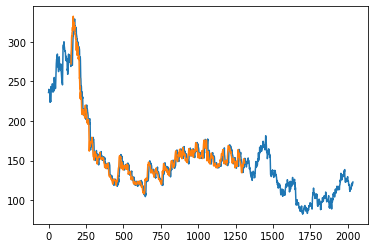

In [67]:
plt.plot(sc.inverse_transform(df2))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()